In [2]:
import superblockify as sb
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy
import geopandas as gpd

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


2025-04-16 10:24:53,525 |     INFO | __init__.py:11 | superblockify version 1.0.1


In [3]:
df = pd.read_json("../data/processed/city_partners_public/metadata_cities.json")
df

,Cities,Area,Number of edges,Total road length,Road density,Total estimated population,Population density
0,Amsterdam,197.310440,29363,2773.695725,14.057521,1.116148e+06,5656.812950
1,Southwark,29.935407,9642,754.803041,25.214391,6.546476e+05,21868.672965
2,Vilnius,393.538646,18395,3474.021407,8.827650,9.697433e+05,2464.162799
3,Milan_Municipality,181.755362,25361,2525.412978,13.894572,1.717573e+06,9449.916510
4,Vratsa,15.643470,2619,268.839684,17.185426,4.688643e+04,2997.188369
5,Braga,55.123125,9834,967.107288,17.544493,2.009707e+05,3645.851553
6,Westminster,22.048690,7452,570.219287,25.861821,4.653211e+05,21104.249344
7,Riga,304.120728,23467,2962.878031,9.742440,9.981629e+05,3282.127131
8,Kozani,4.664904,3785,200.506345,42.981881,4.303159e+04,9224.538858
9,Zaragoza,46.546535,9008,783.128039,16.824626,6.429889e+05,13813.894527


In [4]:
for city in df["Cities"].values:
    G = sb.utils.load_graphml_dtypes(
        f"../data/processed/city_partners_public/graphs_SB/{city}/{city}.graphml"
    )
    print(city, len(list(nx.weakly_connected_components(G))))

Amsterdam 1
Southwark 1
Vilnius 1
Milan_Municipality 1
Vratsa 1
Braga 1
Westminster 1
Riga 1
Kozani 1
Zaragoza 1
Cugir 1
Haifa 1


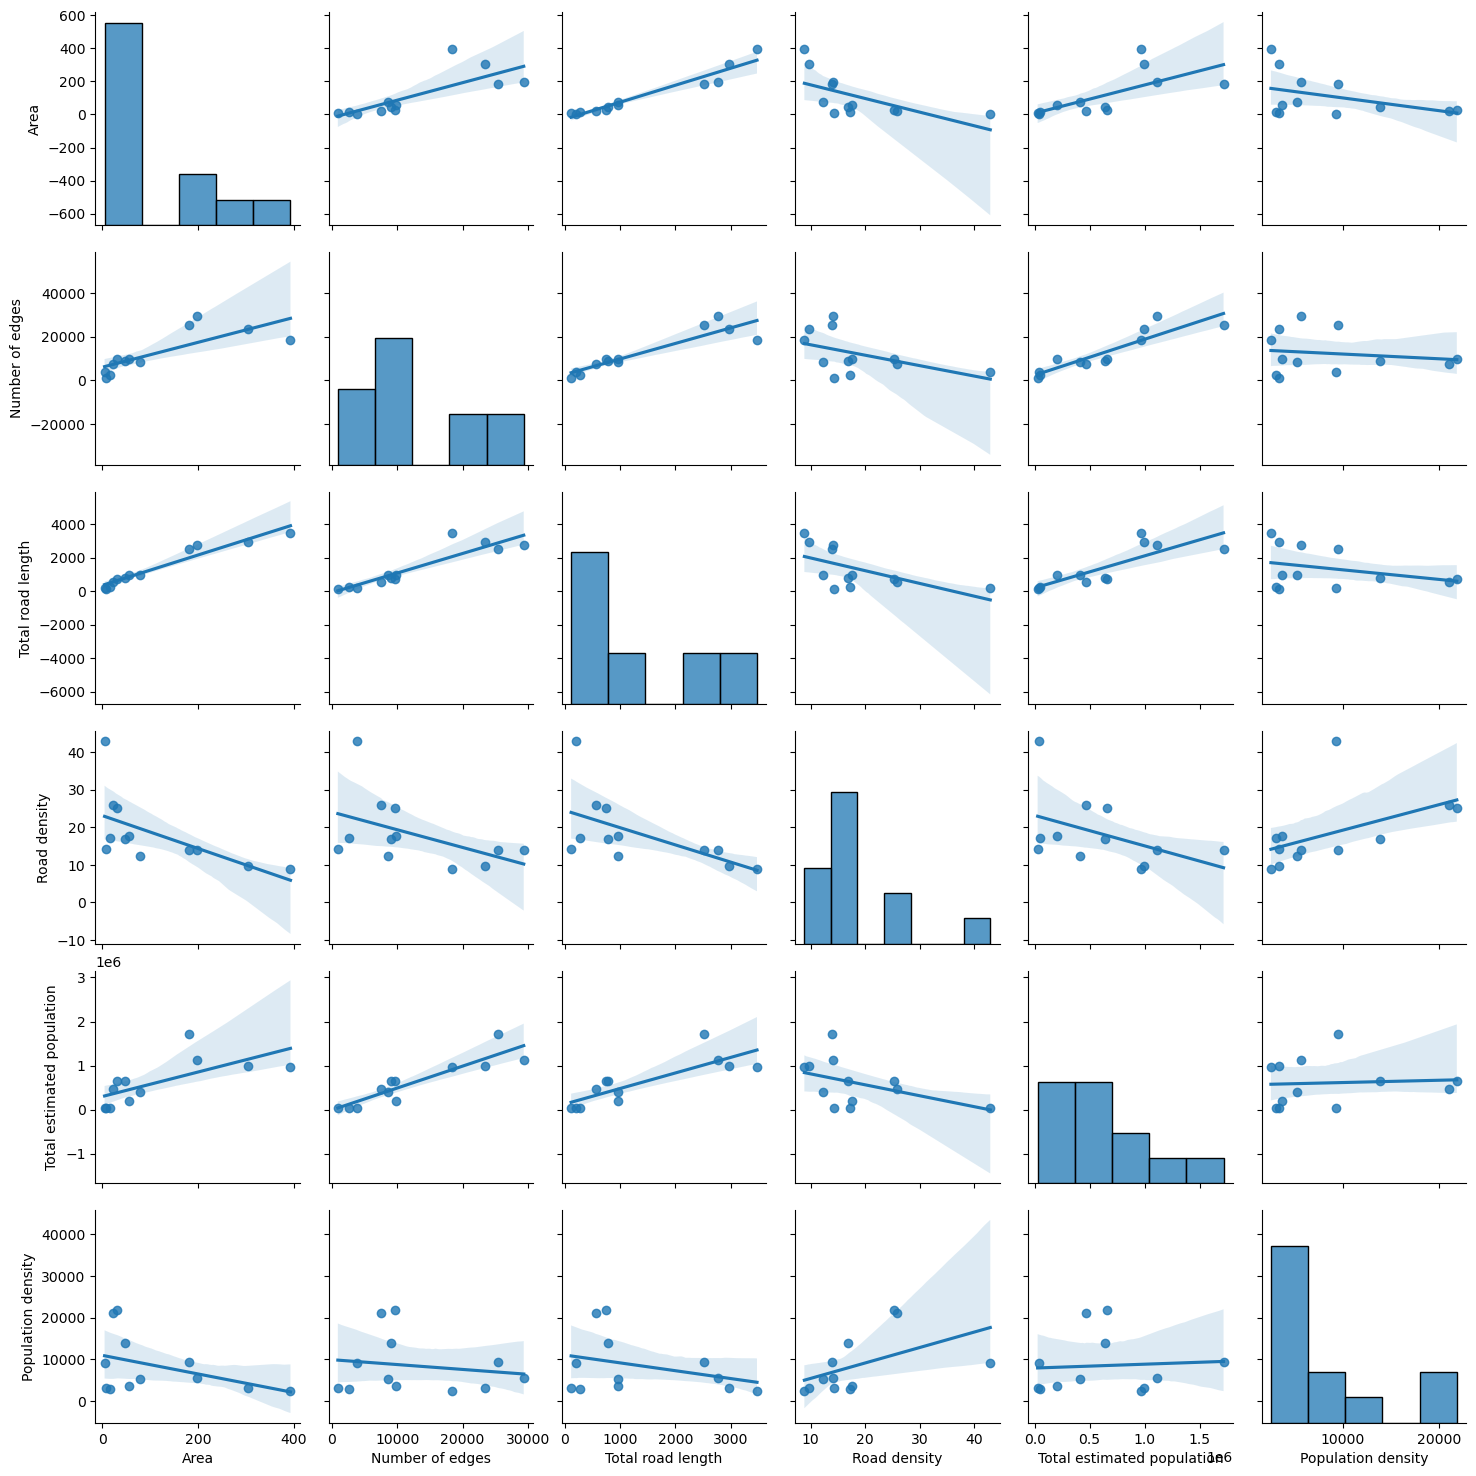

In [5]:
sns.pairplot(df, kind="reg", diag_kind="hist");

In [6]:
df_filt = df[df["Road density"] < 40]

In [7]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Road density"], df_filt["Population density"]
)
print(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Area"], df_filt["Road density"]
)
print(r_value)

0.8456822102993697
-0.7119070329732073


In [8]:
df = gpd.read_file(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/Amsterdam_betweenness.gpkg",
    layer="ltns",
)
len(df)

546

In [9]:
df_filt = df[
    (df["geometry"].area < 921600) & (df["geometry"].area > 25600) & (df["n"] > 5)
]
len(df_filt)

179

In [32]:
df = pd.read_json(
    "../data/processed/city_partners_public/results_cities_residential_all.json"
)
df

,Cities,Amount of superblocks,Share of streets within superblocks,Share of the population within superblocks
0,Amsterdam,706,44.5,58.2
1,Braga,240,66.6,77.5
2,Cugir,19,68.4,71.2
3,Haifa,232,40.8,56.2
4,Kozani,83,75.7,74.8
5,Milan_Municipality,750,34.8,48.9
6,Riga,655,56.8,59.0
7,Southwark,394,61.6,65.6
8,Vilnius,655,60.7,57.9
9,Vratsa,18,77.4,78.8


In [12]:
# TODO understand how to get the average travel distance increase on the entire graph